In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


In [2]:
# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on="city", how="left")  # len = 2375
# Display the data table for preview
# --> merge_table.loc[(merge_table['city'] =='Lake Jonathanshire'), : ]
merge_table.head(5)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

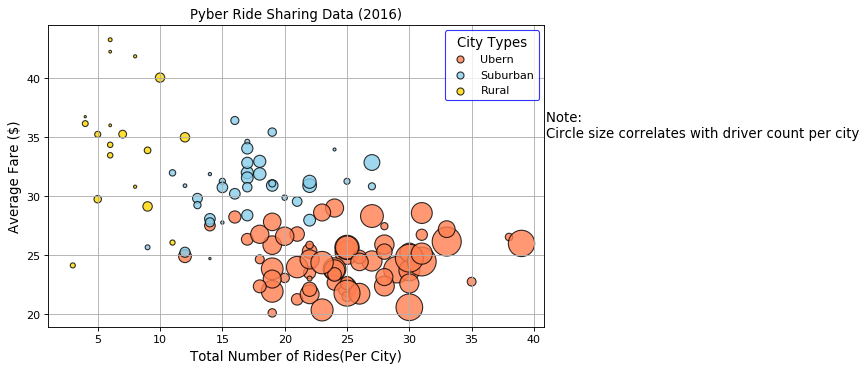

In [3]:
# Obtain the x and y coordinates for each of the three city types
ubern_data = merge_table.loc[ (merge_table['type'] == 'Urban'), : ]
rural_data = merge_table.loc[ (merge_table['type'] == 'Rural'), : ]
suburban_data = merge_table.loc[ (merge_table['type'] == 'Suburban'), : ]

u_count = ubern_data.groupby(['city']).city.count()   # series
r_count = rural_data.groupby(['city']).city.count()
s_count = suburban_data.groupby(['city']).city.count()

u_avg_fare = [i for i in ubern_data.groupby(['city']).fare.mean()]
r_avg_fare = [i for i in rural_data.groupby(['city']).fare.mean()]
s_avg_fare = [i for i in suburban_data.groupby(['city']).fare.mean()]
# Build the scatter plots for each city types
plt.figure(figsize=(8, 5), dpi=80)
su = plt.scatter(u_count, u_avg_fare, marker="o", facecolors="coral", edgecolors="black",
             s=ubern_data.groupby(['city']).driver_count.sum() * 0.3, 
             alpha=0.8, label="Ubern")
ss = plt.scatter(s_count, s_avg_fare, marker="o", facecolors="SkyBlue", edgecolors="black",
             s=suburban_data.groupby(['city']).driver_count.sum() * 0.3, 
             alpha=0.8, label='Suburban')
sr = plt.scatter(r_count, r_avg_fare, marker="o", facecolors="gold", edgecolors="black",
             s=rural_data.groupby(['city']).driver_count.sum(),
             alpha=0.8, label='Rural')
# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)", fontsize=12)
plt.xlabel("Total Number of Rides(Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
# Create a legend
lgnd  = plt.legend(handles=[su, ss, sr],loc='upper right',  markerscale=2, title='City Types', fontsize=10)
for legend_handle in lgnd.legendHandles:
    legend_handle.set_sizes([40])
lgnd.set_title('City Types',prop={'size':12})
lgnd.get_frame().set_edgecolor('b')
# Incorporate a text label regarding circle size
plt.text(41,35,'Note: \nCircle size correlates with driver count per city',horizontalalignment='left',fontsize=12)
# Save Figure
plt.savefig("images/RideShareData.png", dpi=600 )
# Show plot
plt.show()

## Total Fares by City Type

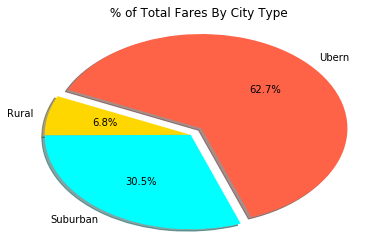

In [4]:
# Calculate Type Percents

#  ubern_data = merge_table.loc[ (merge_table['type'] == 'Urban'), : ]
#  rural_data = merge_table.loc[ (merge_table['type'] == 'Rural'), : ]
#  suburban_data = merge_table.loc[ (merge_table['type'] == 'Suburban'), : ]

u_total_fares = ubern_data.fare.sum()    # series
r_total_fares = rural_data.fare.sum()
s_total_fares = suburban_data.fare.sum()
all_tot_fares = u_total_fares + r_total_fares + s_total_fares
total_fares = [ u_total_fares / all_tot_fares, \
                r_total_fares / all_tot_fares, \
                s_total_fares / all_tot_fares ]

# Build Pie Chart
plt.pie(total_fares, explode=[0.1, 0, 0], labels=["Ubern", "Rural", "Suburban"], \
        colors=["tomato","gold","cyan"], 
        autopct="%1.1f%%", shadow=True, startangle=290)

plt.title(" % of Total Fares By City Type")
plt.axis('auto')

# Save Figure
plt.savefig("images/TotalFaresByCity.png")
plt.show()

## Total Rides by City Type

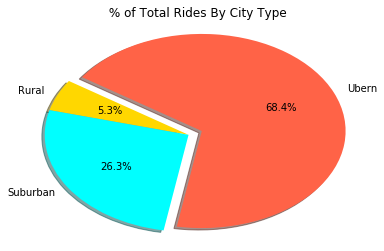

In [5]:
# Calculate Ride Percents
u_total_rides = ubern_data.ride_id.count()    # series
r_total_rides = rural_data.ride_id.count()
s_total_rides = suburban_data.ride_id.count()
all_tot_rides = u_total_rides + r_total_rides + s_total_rides
total_rides = [ u_total_rides / all_tot_rides, \
                r_total_rides / all_tot_rides, \
                s_total_rides / all_tot_rides ]
# Build Pie Chart
plt.pie(total_rides, explode=[0.1, 0, 0], labels=["Ubern", "Rural", "Suburban"], \
        colors=["tomato","gold","cyan"], 
        autopct="%1.1f%%", shadow=True, startangle=260)

plt.title(" % of Total Rides By City Type")
plt.axis('auto')
# Save Figure
plt.savefig("images/TotalRidesByCity.png")
plt.show()

## Total Drivers by City Type

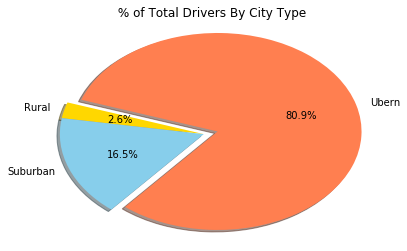

In [6]:
# Calculate Driver Percents 

ubern_city_data = city_data.loc[ (city_data['type'] == 'Urban'), : ]
rural_city_data = city_data.loc[ (city_data['type'] == 'Rural'), : ]
suburban_city_data = city_data.loc[ (city_data['type'] == 'Suburban'), : ]

u_total_drivers = float(ubern_city_data.driver_count.sum())   # series
r_total_drivers = float(rural_city_data.driver_count.sum())
s_total_drivers = float(suburban_city_data.driver_count.sum())
all_tot_drivers = u_total_drivers + r_total_drivers + s_total_drivers
total_drivers = [ u_total_drivers / all_tot_drivers, \
                r_total_drivers / all_tot_drivers, \
                s_total_drivers / all_tot_drivers ]
# Build Pie Charts
plt.pie(total_drivers, explode=[0.1, 0, 0], labels=["Ubern", "Rural", "Suburban"], \
        colors=["Coral","gold","SkyBlue"], 
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.title(" % of Total Drivers By City Type")
plt.axis('auto')
# Save Figure
plt.savefig("images/TotalDriversByCity.png", dpi=800)
plt.show()
